In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams.update({'font.size': 22})
plt.rc('axes', axisbelow=True)

%config Completer.use_jedi = False

In [450]:
def make_line_chart(x,y, labels, xlabel="", ylabel="", scale="linear", name="result.png"):
    linewidth = 3
    fig = plt.subplots(figsize =(12, 6))
    
    plt.grid(color='grey', linestyle='-', linewidth=1)
    
    for x_values, y_values, label in zip(x, y, labels):
        plt.plot(x_values, y_values, label=label, linewidth=linewidth)
        
        
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    plt.yscale(scale)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0]) if t[0].isnumeric() else 0))
    plt.legend(handles, labels)
    
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    

In [451]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i + 0.25, y[i], round(y[i], 2), ha = 'center')

def make_bar_chart(x,y, xlabel="", ylabel="", scale="linear", name="result.png", lables=False):
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 6))
    
    plt.gca().yaxis.grid(color='grey', linestyle='-', linewidth=1)
    
    y = [val for _,val in sorted(zip(x,y))]
    x.sort()
    
    x = [str(int(i)) if not pd.isna(i) else "Never" for i in x]
    
    num_elements_in_x = len(x)

    # Set position of bar on X axis
    br1 = list(map(lambda x: x + barWidth, np.arange(num_elements_in_x)))

    # Make the plot
    plt.bar(br1, y, color ='r', width = barWidth,edgecolor ='grey')
    
    if lables:
        add_labels(br1, y)

    # Adding Xticks
    plt.xlabel(xlabel)
    plt.xticks([r + barWidth for r in range(num_elements_in_x)], x, rotation=90)
    
    plt.ylabel(ylabel)
    plt.yscale(scale)
    
    plt.savefig(name, bbox_inches='tight')
    plt.show()

In [452]:
def combine_column_and_file_name(column, file):
    return f'{file}_{column}'

In [453]:
def get_data(columns: list[str]):
    base_dir = Path('../experiment/20220124')
    csv_files = base_dir.glob('*.csv')
    
    dfs = {file.name : pd.read_csv(file) for file in csv_files}
    
    res_df = pd.DataFrame()
    for file_name, df in dfs.items():
        for column in columns:
            res_df[combine_column_and_file_name(file_name, column)] = df[column]
    return res_df

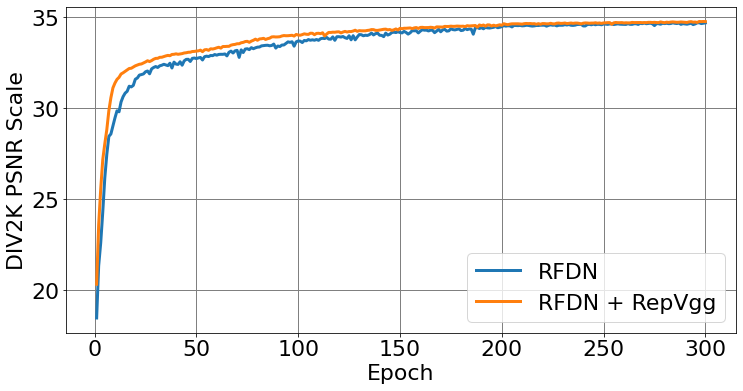

In [454]:
data = get_data(["validate.DIV2K.psnr_scale_2", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn.*_600.csv")).head(300).transpose()
filtered_y = data.filter(regex=("validate\.DIV2K.psnr_scale_2.*_600.csv")).head(300).transpose()
lables = ["RFDN", "RFDN + RepVgg"]
make_line_chart(filtered_x.values, filtered_y.values, lables, "Epoch", "DIV2K PSNR Scale", "linear", "epoch_psnr_scale.pdf")

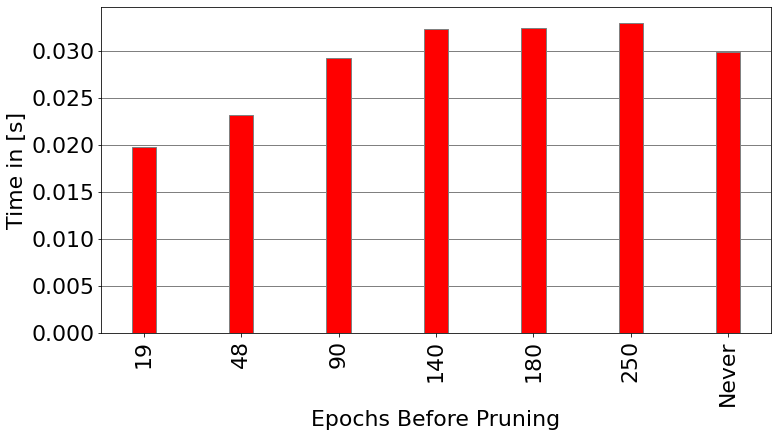

In [455]:
data = get_data(["validate.mean_forward_pass_time", "config.epochs_before_pruning"])
filtered_y = data.filter(regex=("validate\.mean_forward_pass_time_rfdn_advanced_600_epochs_before_pruning.*")).mean()
filtered_x = data.filter(regex=("config\.epochs_before_pruning_rfdn_advanced_600_epochs_before_pruning.*")).head(1)
make_bar_chart(filtered_x.values[0], filtered_y.values, "Epochs Before Pruning", "Time in [s]", "linear", "epochs_before_pruning_average_validation_time.pdf", False
              )

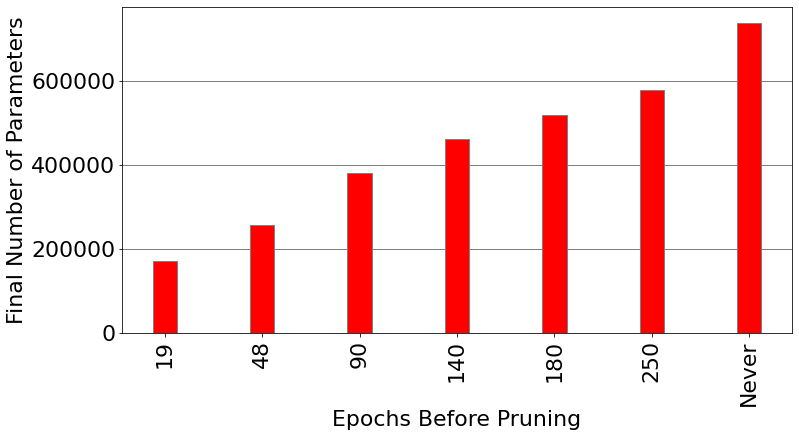

In [456]:
data = get_data(["num_parameters", "config.epochs_before_pruning"])
filtered_y = data.filter(regex=("num_parameters_rfdn_advanced_600_epochs_before_pruning.*")).min()
filtered_x = data.filter(regex=("config\.epochs_before_pruning_rfdn_advanced_600_epochs_before_pruning.*")).head(1)
make_bar_chart(filtered_x.values[0], filtered_y.values, "Epochs Before Pruning", "Final Number of Parameters", "linear", "epochs_before_pruning_final_number_of_parameters.pdf")

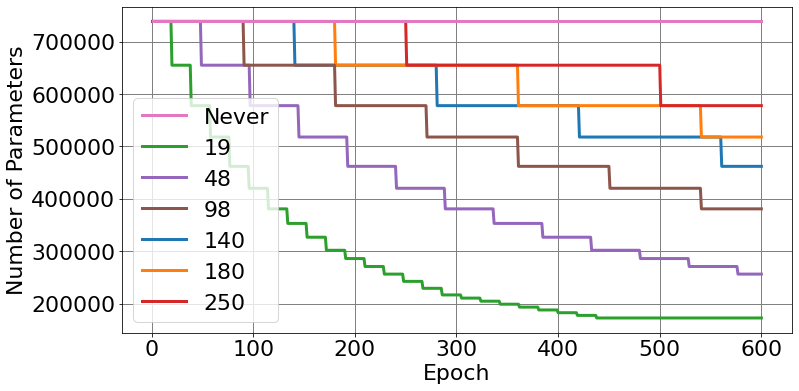

In [457]:
data = get_data(["num_parameters", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn_advanced_600_epochs_before_pruning.*")).head(600).transpose()
filtered_y = data.filter(regex=("num_parameters_rfdn_advanced_600_epochs_before_pruning.*")).head(600).transpose()
lables = [140, 180, 19, 250, 48, 98, "Never"]
make_line_chart(filtered_x.values, filtered_y.values, lables, "Epoch", "Number of Parameters", "linear", "epochs_before_pruning_number_of_parameters.pdf")

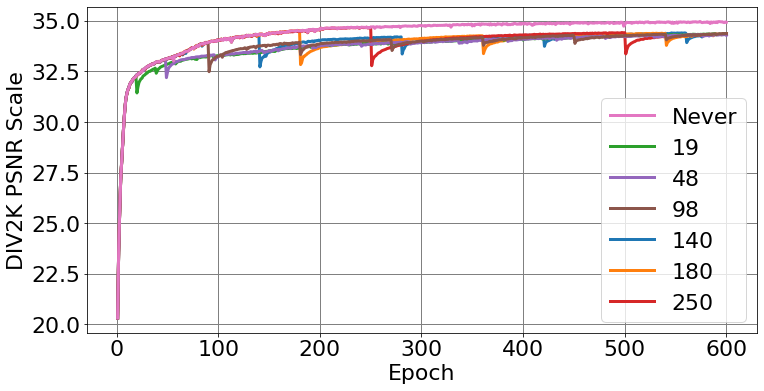

In [458]:
data = get_data(["validate.DIV2K.psnr_scale_2", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn_advanced_600_epochs_before_pruning.*")).head(600).transpose()
filtered_y = data.filter(regex=("validate\.DIV2K.psnr_scale_2_rfdn_advanced_600_epochs_before_pruning.*")).head(600).transpose()
lables = [140, 180, 19, 250, 48, 98, "Never"]
make_line_chart(filtered_x.values, filtered_y.values, lables, "Epoch", "DIV2K PSNR Scale", "linear", "epochs_before_pruning_div2k_psnr.pdf")

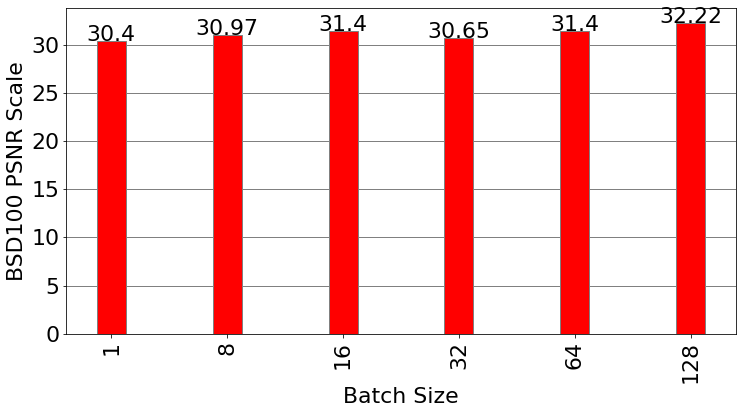

In [431]:
data = get_data(["test.BSD100.psnr_scale_2", "config.batch_size_test"])
filtered_y = data.filter(regex=("test\.BSD100\.psnr_scale_2_rfdn_advanced_batch_size_test.*")).head(1)
filtered_x = data.filter(regex=("config\.batch_size_test_rfdn_advanced_batch_size_test.*")).head(1)
make_bar_chart(filtered_x.values[0], filtered_y.values[0], "Batch Size", "BSD100 PSNR Scale", "linear", "batch_size_test_BSD100_PSNR.pdf", True)